<a href="https://colab.research.google.com/github/LeNoRaV/MathStat/blob/main/%D0%94%D0%976_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 6. Последовательный критерий отношения правдоподобия

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import seaborn as sb
from prettytable import PrettyTable

np.set_printoptions(precision=3, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)

In [ ]:
df = pd.read_csv('ДЗ5.csv',delimiter=';',header=None)
x = df.to_numpy()
print("Выборка (вариант 10) \n", x)

Выборка (вариант 10) 
 [[-15.754  -5.357  -5.177  -7.58   -0.929 -13.199  -8.135   0.323  -8.631
   -1.297]
 [-10.437  -3.874  -8.748  -8.036  -7.85  -11.149 -12.184  -7.747  -3.767
    1.761]
 [-11.87    0.823  -1.097  -8.208 -12.289  -8.661  -2.067  -7.831  -4.29
   -7.062]
 [ -3.571 -12.35  -10.295  -8.066  -1.334  -2.598  -7.224  -5.336  -7.22
   -7.747]
 [ -6.725  -4.637  -5.206  -8.816 -11.586 -14.533 -10.135  -9.516  -5.503
   -9.966]
 [ -8.782 -10.151  -5.609  -5.025  -8.187  -7.44   -5.41   -9.567  -6.365
   -9.776]
 [-12.632  -6.32   -7.54   -1.798  -9.049 -10.221  -2.571 -10.856  -5.774
   -7.42 ]
 [-11.878  -2.76   -0.8    -7.944  -6.091   0.113  -3.328 -10.045  -7.386
   -4.706]
 [-10.041  -9.209  -4.214  -9.859  -4.108  -3.329   2.647  -8.015  -8.397
   -7.12 ]
 [ -4.833  -5.303 -14.177  -4.619 -15.765  -8.972  -0.772 -17.609  -3.698
   -1.299]
 [ -1.904  -6.024  -7.803  -5.757  -0.452  -7.508  -3.84   -7.814  -5.63
   -5.21 ]
 [ -2.536  -7.717  -5.87   -4.508  -3.493 -10

In [ ]:
n = x.size
Max = np.amax(x)
Min = np.amin(x)
w = Max - Min

print("Размер n = %d\nКрайние члены вариационного ряда max = %.3f, min = %.5f\nРазмах выборки w = %f" 
      %(n, Max, Min, w))

Размер n = 120
Крайние члены вариационного ряда max = 2.647, min = -17.60900
Размах выборки w = 20.256000


In [ ]:
l = math.trunc(1 + math.log2(n))
h = w / l

print("Число интервалов l = %d\nШаг(ширина интервалов группировки) h = %f" %(l, h))

hist, bin_edges = np.histogram(x, l)
bin_edges_average = np.zeros(bin_edges[:7].size)
for i in range (l):
    bin_edges_average[i] = (bin_edges[i] + bin_edges[i + 1]) / 2 
f1 = bin_edges_average
f2 = hist

print("\n")
th = ["Cредние значения каждого из  интервалов", "Частоты попадания элементов в каждый из интервалов"]
td = np.array(f1[0])
for i in range(len(f1)-1):
    td = np.append(td, f2[i])
    td = np.append(td, f1[i+1])
td = np.append(td, f2[6])
print_table(th, td)

p = hist / n

Int = f1
intl = Int - h / 2
intl = np.append(intl, Max)

print("\n")
th = ["Интервал", "Середина интервала int", "Частота f2", "Относительная частота p"]
td = []
for i in range(l):
    td.append("["+str(round(intl[i], 4))+","+str(round(intl[i + 1], 4))+")")
    td.append(round(Int[i], 4))
    td.append(f2[i])
    td.append(round(p[i], 4))
print_table(th, np.array(td))

Число интервалов l = 7
Шаг(ширина интервалов группировки) h = 2.893714


+-----------------------------------------+----------------------------------------------------+
| Cредние значения каждого из  интервалов | Частоты попадания элементов в каждый из интервалов |
+-----------------------------------------+----------------------------------------------------+
|            -16.16214285714286           |                        3.0                         |
|           -13.268428571428574           |                        9.0                         |
|           -10.374714285714287           |                        20.0                        |
|            -7.481000000000002           |                        36.0                        |
|            -4.587285714285716           |                        31.0                        |
|           -1.6935714285714303           |                        16.0                        |
|            1.2001428571428565           |           

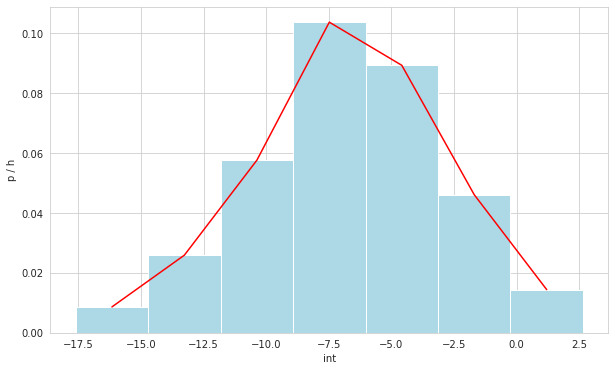

In [ ]:
sb.set_style("whitegrid")
plt.figure(figsize=(10,6))
X = Int
Y = p / h
plt.bar(X, Y, width=h, color='lightblue')
plt.plot(X, Y, color='red')
plt.xlabel("int")
plt.ylabel("p / h")
plt.show()

In [ ]:
xm = sum(x[i, j] for i in range(np.shape(x)[0]) for j in range(np.shape(x)[1])) / n
s2 = sum((x[i, j] - xm) ** 2 for i in range(np.shape(x)[0]) for j in range(np.shape(x)[1])) / (n - 1)
print("Выброчное среднее xm =", round(xm, 5))
print("Выборочная дисперсия s2 =", round(s2, 5))

Выброчное среднее xm = -6.73672
Выборочная дисперсия s2 = 14.95452


Вар	10

α	0.1

a_0	-6.8

H_2:	a>a_0

σ_0	3.2

H_3: σ>σ_0

H_1: a=a_1=-6.2

σ_1	3.4

ε	0.15

n 120

In [ ]:
alpha = 0.1
a_0 = -6.8
a_1 = -6.2
sigma_0 = 3.2
sigma_1 = 3.4
epsilon = 0.15

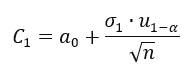

In [ ]:
norm_1_alpha = sp.stats.norm.ppf(1-alpha)
print("norm_1_alpha =", round(norm_1_alpha, 5))
c1 = a_0+(sigma_1*norm_1_alpha)/math.sqrt(n)
print("C_1 =", round(c1, 5))

norm_1_alpha = 1.28155
C_1 = -6.40224


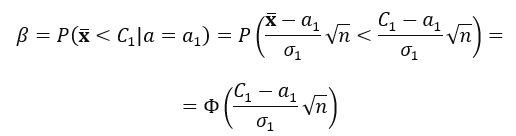

In [ ]:
beta = sp.stats.norm.cdf((c1-a_1)/sigma_1*math.sqrt(n))
print("beta =", round(beta, 5))

beta = 0.25733


1)	постройте последовательный критерий Вальда для проверки гипотезы H_0: a=a_0  против альтернативы H_1:a=a_1 при известном σ=σ_1. Ошибка первого рода задана в условии, ошибка второго рода β вычислена вами в пункте 4.

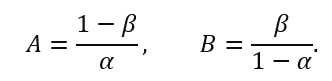

In [ ]:
A=(1-beta)/alpha
B=beta/(1-alpha)
print("A =", round(A, 5))
print("B =", round(B, 5))

A = 7.42666
B = 0.28593


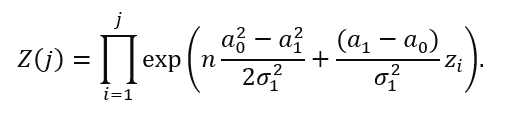

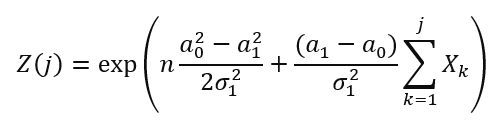

In [ ]:
z=x.transpose()
z=z.flatten()
Z_mass=[0 for j in range(n)]
A_mass=[A for j in range(n)]
B_mass=[B for j in range(n)]

for j in range(0,n):
  pr_z=1
  for i in range(0,j+1):
    pr_z*=math.exp(((a_0**2-a_1**2)/(2*sigma_1**2))+(a_1-a_0)/(sigma_1**2)*z[i])
  Z_mass[j]=pr_z
print (Z_mass)

[0.6185907210980762, 0.5042646854407347, 0.38160329588803754, 0.44425814361184657, 0.4391001843138292, 0.39005380484417607, 0.28372764868904415, 0.2146223230502673, 0.1785896862689252, 0.1947298883723327, 0.24719070488354444, 0.30365860725306965, 0.3222183197437894, 0.36926956481164663, 0.5400239068215045, 0.3986086834753055, 0.43907739423826525, 0.3632812851129594, 0.3666911662253728, 0.44525076126841406, 0.386848094612026, 0.4116445043150327, 0.4219412159455134, 0.39611315510840456, 0.4242690202391001, 0.37754491246801036, 0.49975704033196006, 0.4104071610472839, 0.4389178968255522, 0.45969261927052874, 0.43553658880706275, 0.5854768007371226, 0.6592330265461331, 0.4425780666421379, 0.413636311412931, 0.42738535408416695, 0.40408720616362964, 0.37312277766300334, 0.341469037624343, 0.31481234535263397, 0.27915554063987624, 0.30136622310437455, 0.38466570413371304, 0.3568896246262675, 0.29979053037799613, 0.33053539751973576, 0.3435311426645269, 0.38095024414057055, 0.5086809602738956

Приведем графическую иллюстрацию последовательного критерия



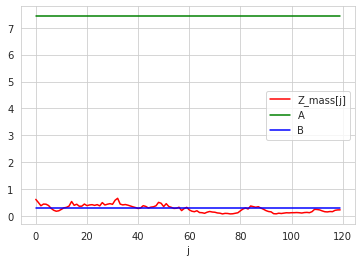

In [ ]:
print("Приведем графическую иллюстрацию последовательного критерия\n")
xx = np.arange (0, n, 1)
sb.set_style("whitegrid")
plt.plot(xx, Z_mass, color='red',label='Z_mass[j]')
plt.plot(xx, A_mass, color='green',label='A')
plt.plot(xx, B_mass, color='blue',label='B')
plt.xlabel("j")
plt.legend() 
plt.show()

Вычислим математическое ожидание момента принятия решения при основной гипотезе H_0: a=a_0 и при альтернативе H_1:a=a_1

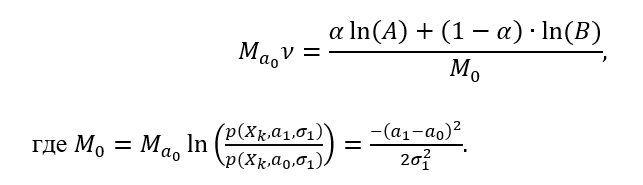

In [ ]:
M_0=(-(a_1-a_0)**2)/(2*sigma_1**2)
print("M_0 =", M_0)
M_a0=(alpha*math.log(A)+(1-alpha)*math.log(B))/M_0
print("M_a0 =", M_a0)

M_0 = -0.015570934256055347
M_a0 = 59.48973616113494


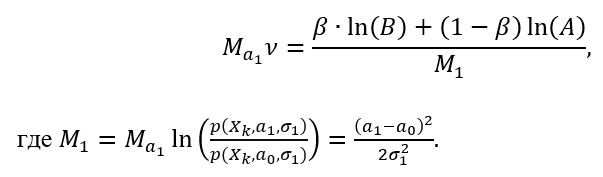

In [ ]:
M_1=((a_1-a_0)**2)/(2*sigma_1**2)
print("M_1 =", M_1)
M_a1=(beta*math.log(B)+(1-beta)*math.log(A))/M_1
print("M_a1 =", M_a1)

M_1 = 0.015570934256055347
M_a1 = 74.94188145332375


	Перепишем критическое множество из пункта 3 в виде ((L((X_n ) ⃗,a_1))/(L((X_n ) ⃗,a_0))≥C),  отметим на графике и сравним результаты применения критериев Вальда и Неймана-Пирсона.

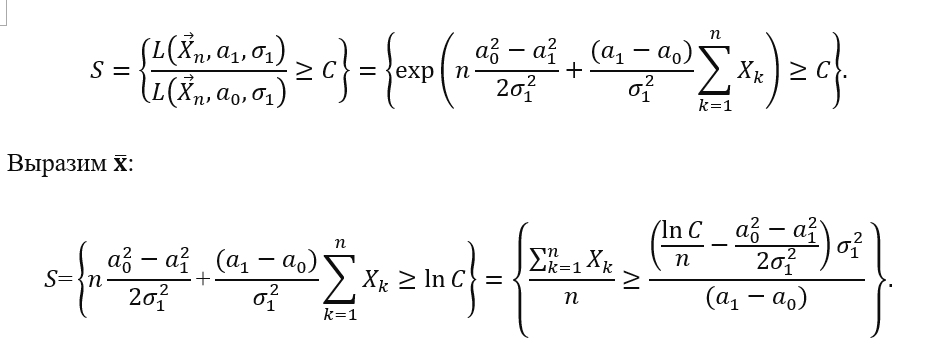

In [ ]:
C_mass=[1.864 for j in range (n)]

Приведем графическую иллюстрацию последовательного критерия



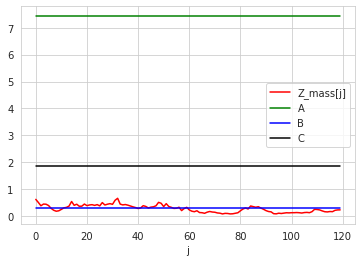

In [ ]:
print("Приведем графическую иллюстрацию последовательного критерия\n")
xx = np.arange (0, n, 1)
sb.set_style("whitegrid")
plt.plot(xx, Z_mass, color='red',label='Z_mass[j]')
plt.plot(xx, A_mass, color='green',label='A')
plt.plot(xx, B_mass, color='blue',label='B')
plt.plot(xx, C_mass, color='black',label='C')
plt.xlabel("j")
plt.legend() 
plt.show()